## Rotation Matrix

https://www.youtube.com/watch?v=8XRvpDhTJpw

### Brief introduction

How to rotation a image. Usually we do not rotate the image, we rotate the axis.

<center><img src="https://pic4.zhimg.com/80/v2-122db2e357a1bcaa60e008dbd8bc4192.png" width="300"/></center>


$$
\begin{aligned}
x_b =& c + f\\
=& x_a \cos \theta + y_a \sin\theta
\end{aligned}
$$

<center><img src="https://pic4.zhimg.com/80/v2-0d77c7d28c2789557cd5a99ca2b12e76.png" width="300"/></center>

$$
\begin{aligned}
y_b =& f\cos\theta\\
=& (y_a - e) \cos\theta\\
=& y_a \cos\theta - e\cos\theta\\
=& y_a \cos\theta - \frac{x_a}{\tan\theta}\cos\theta\\
=& y_a \cos\theta - x_a\sin\theta\frac{\cos\theta}{\cos\theta}\\
=& y_a \cos\theta - x_a\sin\theta\\
\end{aligned}
$$

Thus 

$$
\begin{aligned}
\left[\begin{matrix} x_b \\ y_b\end{matrix}\right] =& \left[\begin{matrix} x_a \cos \theta + y_a \sin\theta\\ x_a -\sin\theta + y_a \cos\theta\end{matrix}\right] \\ =& \left[\begin{matrix} \cos \theta & \sin\theta\\ \sin\theta & \cos\theta \end{matrix}\right] \left[\begin{matrix} x_a \\ y_a\end{matrix}\right]
\end{aligned}
$$

## A simple example

Rotate a gabor filter

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
def fspecial_gauss(n, sig):
    '''Create a 2D guass
    This function mimic the fspecial in matlab
    
    Args:
        n: the size of the filter
        sig: the standard deviation

    Returns:
        g: a 2-D gausss filter 
    '''
    siz = n//2
    x,y = np.mgrid[-siz:siz, -siz:siz]
    g   = np.exp(-(x**2+y**2)/(2*sig**2))
    g[g < np.finfo(g.dtype).eps] = 0
    if g.sum() != 0: g = g / g.sum()
    return g

In [4]:
def getGabor(n, theta=3/4*np.pi, ppc=1.5):
    '''Create a gabor

    Args:
        n: the size of the image
        theta: the orientation
    Returns:
        gabor: a gabor filter
    '''
    # complex harmonic 
    x,y = np.mgrid[:n, :n]
    w = np.cos(theta)*x/ppc + np.sin(theta)*y/ppc
    h = np.exp(1j*w)*np.pi*2
    # gauss with spatial frequency
    gauss = fspecial_gauss(n, n/8)
    # creat a gabor
    gabor= gauss * h
    gabor_ = gabor - gabor.mean()
    g = np.imag(gabor_)
    return g / np.linalg.norm(g)

In [5]:
def plot_rotate(img, theta, ax, cmap='Greys'):
    '''Rotate an image and plot it

    Args:
        img: the image waited to rotate
        tehta: the radian you want to rotate
        ax: the axis of the plot
        cmap: color map
    Returns:
        an plt axis with rotated image
    '''
    nX, nY = img.shape
    midx = np.ceil((nX+1)/2)
    midy = np.ceil((nX+1)/2)

    # rotate the coordination 
    rot_mat = np.array([[np.cos(theta), np.sin(theta)], 
                        [-np.sin(theta), np.cos(theta)]])
    xx, yy = np.mgrid[:nX, :nY]
    # move the image to center on the origin and then rotate 
    XY_orig= np.vstack([xx.reshape([-1])-midx, yy.reshape([-1])-midy]).T @ rot_mat
    # move back from the origin 
    XY_new = XY_orig + np.array([midx, midy]).reshape([-1, 2])
    x_new, y_new = XY_new[:, 0].reshape([nX, nY]), XY_new[:, 1].reshape([nX, nY])
    ax.pcolor(x_new, y_new, img, cmap=cmap)
    ax.set_aspect('equal', 'box')

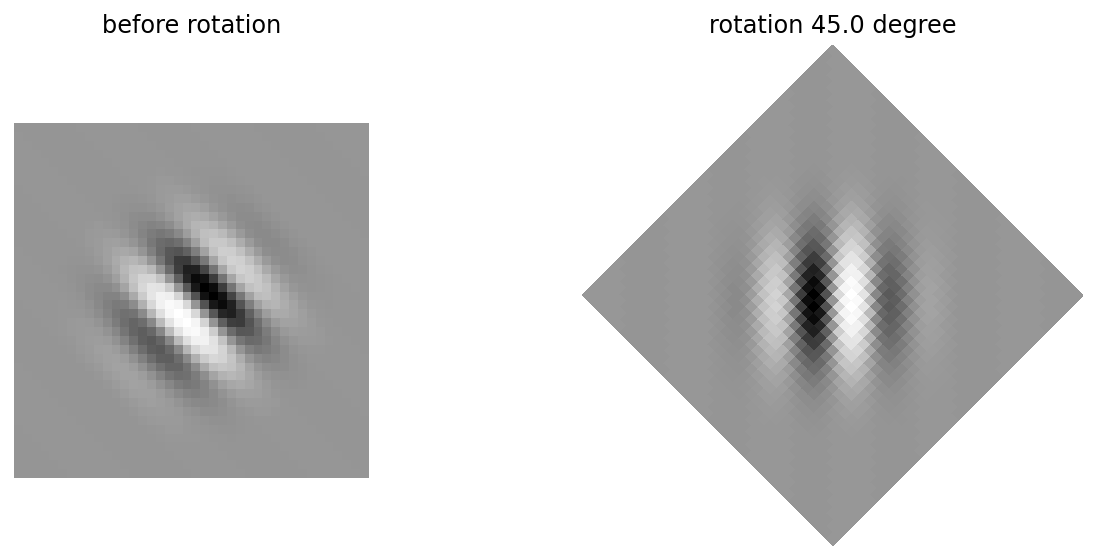

In [6]:
n = 40; theta = 1/4*np.pi
g = getGabor(n, theta=3/4*np.pi)
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
ax = axs[0]
ax.imshow(g, cmap='Greys')
ax.set_aspect('equal', 'box')
ax.set_axis_off()
ax.set_title('before rotation')
ax = axs[1]
plot_rotate(g, theta, ax, cmap='Greys')
ax.set_axis_off()
ax.set_title(f'rotation {theta*(180/np.pi):.1f} degree')
fig.tight_layout()
plt.show()